In [628]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import symbols, diff, lambdify,sympify
from tqdm import tqdm

plt.style.use('seaborn-white')


![](capture.png)

# Defining the objective function and all the needed dervatives
   ## The function dervatives in python and markdown/latex

In [243]:
#expr = (1+(x+y+1)^2*(19-14*x+3*x^2-14*y+6*x*y+3*y^2))*(30+(2*x-3*y)^2*(18-32*x+12*x^2+48*y-36*x*y+27*y^2))
# Since my ID mod 3 = 2. I will go with funtion 3 as per the rules.
np.mod(201693140,3)

2

In [440]:
x, y = symbols('x y', real=True)
expr = (1+(x+y+1)**2*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))

f = lambdify([(x,y)],expr,'numpy')
dfdx  = lambdify([(x,y)],diff(expr,x),'numpy')
dfdy  = lambdify([(x,y)],diff(expr,y),'numpy')

dfdx2 = lambdify([(x,y)],diff(expr,x,x),'numpy')
dfdxy = lambdify([(x,y)],diff(expr,x,y),'numpy')

dfdyx = lambdify([(x,y)],diff(expr,y,x),'numpy')
dfdy2 = lambdify([(x,y)],diff(expr,y,y),'numpy')


# The Plotting

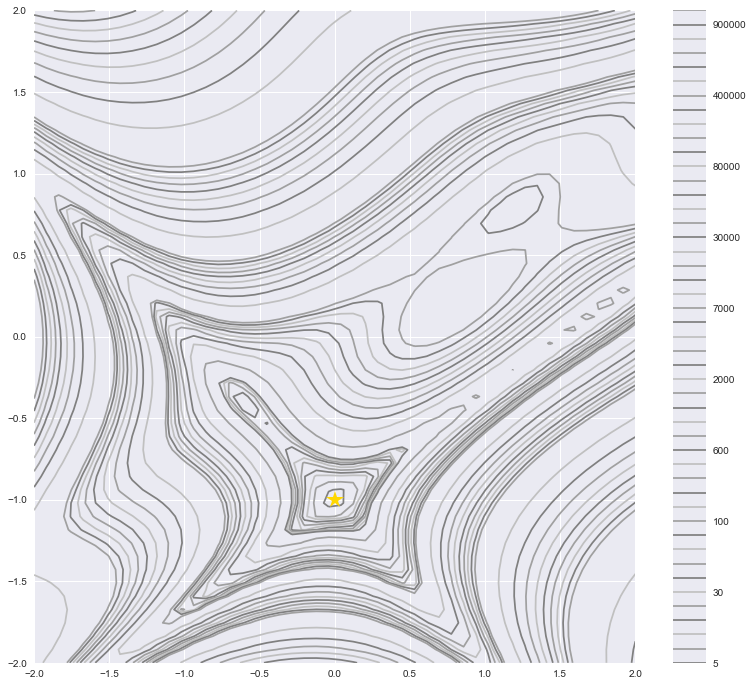

In [722]:
# define and plotting the objective funtion


#set fig size
plt.figure(figsize=(12,12))

#define the region
region_x1 = np.linspace(-2, 2, 100)
region_x2 = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(reigon_x1, reigon_x2)

#get the function output to plot
Z = f([X, Y])
#set the contour line level 
levels = [x*4 for x in range(10)]+[100+x*100 for x in range(100)]+[10001+x*50 for x in range(100)]
levels = (   [5,10,15,20,25,30,35,40,45,50]
            +[100,200,300,400,500,600,700,800,900,1000]
            +[2000,3000,4000,5000,6000,7000,8000,9000,10000]
            +[20000,30000,40000,50000,60000,70000,80000,90000,100000]
            +[200000,300000,400000,500000,600000,700000,800000,900000,1000000]
         )
#set the plot lines color theme and show a legend
plt.contour(X, Y, Z,levels,colors=['#808080', '#A0A0A0', '#C0C0C0']);
#plot the actual minimum point
plt.plot(0,-1,'*',markersize=18,color="gold")

plt.colorbar()


In [723]:
def plot_optim(path,size=12):
    plt.style.use('seaborn')

    #set figure size
    plt.figure(figsize=(size,size))
    #plot the contour
    plt.contour(X, Y, Z,levels,cmap=plt.cm.turbo,zorder=5);

    #seperate path cord
    path_x = []
    path_y = []

    for i in range(len(path)-1):
        path_x.append(path[i][0])
        path_y.append(path[i][1])


    plt.scatter(path_x,path_y,zorder=10)  
    plt.plot(path_x,path_y,linewidth=2,zorder=10)  

    #plot the actual minimum point
    plt.plot(0,-1,'*',markersize=15,color="gold",zorder=15)
    plt.plot(path[-1][0],path[-1][1],'*',markersize=12,color="red",zorder=15)
    #show
    plt.show()
    print(f'best point we got is: {path[-1]} with value = {f(path[-1])}')

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 154694.87it/s]


path lenght = 12


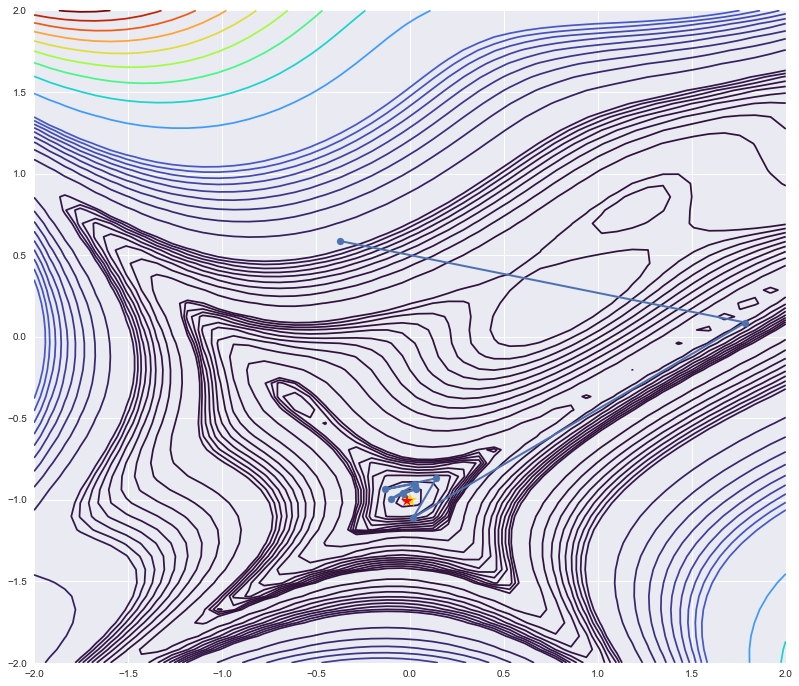

best point we got is: [-0.014173545063193682, -1.0075079905504998] with value = 3.0526207427942413


In [724]:
plot_optim(random_search(samples,f))

# define the Jacobian and Hessian of the function

Let Jacobian of f be

Jacob(x,y):
$\begin{bmatrix}
\frac{df}{dx} & \frac{df}{dy}\\
\end{bmatrix}$

Let Hessian  of f be

Hess(x,y):
$\begin{bmatrix}
\frac{df}{dx^2} & \frac{df}{dxdy}\\
\frac{df}{dydx} & \frac{df}{dy^2}
\end{bmatrix}$


In [648]:
def jacob(X):
    return [dfdx(X),dfdy(X)]

def hess(X):
    return [[dfdx2(X),dfdxy(X)],
            [dfdyx(X),dfdy2(X)]]

In [649]:
hess([0,0])

[[2520, -4680], [-4680, 6120]]

In [650]:
def det(M):
    a = M[0][0]
    b = M[0][1]
    c = M[1][0]
    d = M[1][1]
    
    return a*d - b*c

def inverse(H):
    deter = det(H)
    a = H[0][0]*(1/deter)
    b = H[0][1]*(1/deter)
    c = H[1][0]*(1/deter)
    d = H[1][1]*(1/deter)
    
    return [[d,-b],[-c,a]]

# Sampels Generation

In [651]:
#sample the point into an array
samples = []
for _ in range(10000+1):
    samples.append(np.random.uniform(-2,2,2).tolist())

## Random Search

### Random search is done by generating point in the the ROI and loop through them, setting the one that returns the minimum function output as our best sample/chooice

In [652]:
def random_search(samples,f):
    #take the first sample as out best one  
    best_sample = samples[0]
    
    #add it to the path
    search_path = [samples[0]]

    #search loop
    for i in tqdm(range(len(samples)-1)):
        # load the next sample
        next_sample = samples[i]
        
        #compare current best sample with next sample and take the one with minimum function value output
        if f(next_sample,) < f(best_sample,):
            if math.dist(best_sample,next_sample) < 10**-3:
                print("STOP STOP STOP")
                print(math.dist(best_sample,next_sample))
                break
                
            #add the selected point the  path
            search_path.append(next_sample)
            best_sample = next_sample
        
    print(f'path lenght = {len(search_path)}')

    #return the search path
    return search_path

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 133329.43it/s]


path lenght = 12


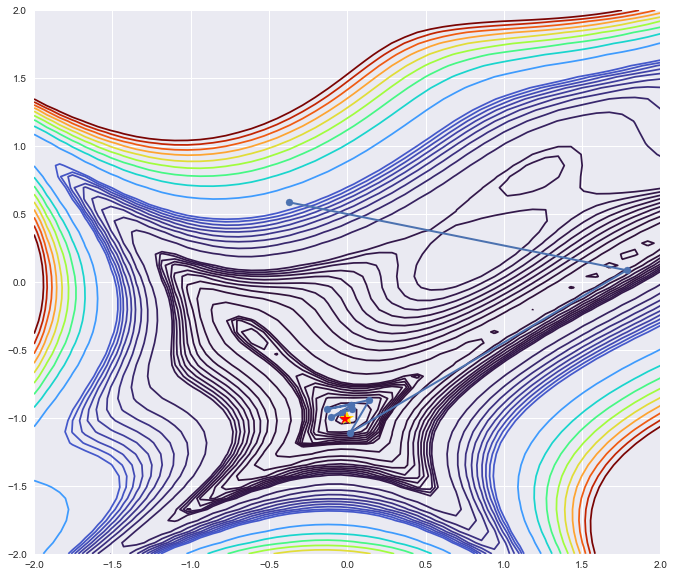

best point we got is: [-0.014173545063193682, -1.0075079905504998] with value = 3.0526207427942413


In [715]:
#run the search and get the point path
plot_optim(random_search(samples,f),10)

# Notes:
* Random search is very quick algorithm to run
* In multi-dimentional optimzation problems where d is small. Random search with uniform sampling can be very powerful
    * But if the dimention d is very large then the Random search algorithm becomes very ineffecent since the liklely hood of landing on a global minimum becomes very low and the number of samples needed increases as well 

<hr style="border:2px solid gray"> </hr>


## Gradient Decent

<hr style="border:2px solid gray"> </hr>


In Gradient Decent we use $grad(f(x))$ to get a vector that points to the greatest increase for a point cord X. then we move our current location point in the oppiste direction.

When using GD we do not follow the change all at once but instead we multiply the gradient with a factor, here a call it the learning rate due to my experance with GS in Deep Learning.

The GD method while great at any dimention d, it is nor garanteded to converge and might get stuck in a local minimum or the gradient might go very very big, we call that in deep learning graiednt explosion.


In [698]:
def GD(X,lr=1e-2,eps=10**-3,append_ever=5,time_out=100_000):
    
    #set the first sample as the initial point on the path
    path = [X]
    #use a counter to check if the GD is stuck bouncing in a reigon
    iterations = 0
    
    #start the loop
    for _ in tqdm(range(time_out)):
       
        #calculate the gradient
        #the gradient might explode, basicly overflows, therefore I use try block to catch the overflow error
        try:
            grad = jacob(X)
        except:
            print(f"Gradient exploded. path lenght = {len(path)}")
            break
            
        if np.isnan(X).any() or np.isinf(X).any():
            print(f"Gradient went to Inf or became Nan. path lenght = {len(path)}")
            break
            
        #calulate the new postion
        new_x = X[0]-(lr*grad[0])
        new_y = X[1]-(lr*grad[1])
        
        #check the stopping condition
        if math.dist(X,[new_x,new_y]) < eps: 
            print(f"STOP. path lenght = {len(path)}")
            print(f'path lenght = {len(path)}')
            break
        
        #a Time out check if the GD is takeing a lot of iteration to converge.
        if iterations == time_out:
            print(f"Time out. path lenght = {len(path)}")
            break
        
        #since the GD might take a lot of steps to converge I use a mod function to add a point evey X iteration.
        if np.mod(iterations,append_ever) == 0:
            path.append(X)
         
        #increase the counter and update X
        iterations += 1
        X = [new_x,new_y]

    #retunr the points path 
    return path

  0%|                                                                             | 3/100000 [00:00<00:17, 5847.08it/s]


Gradient exploded. path lenght = 2


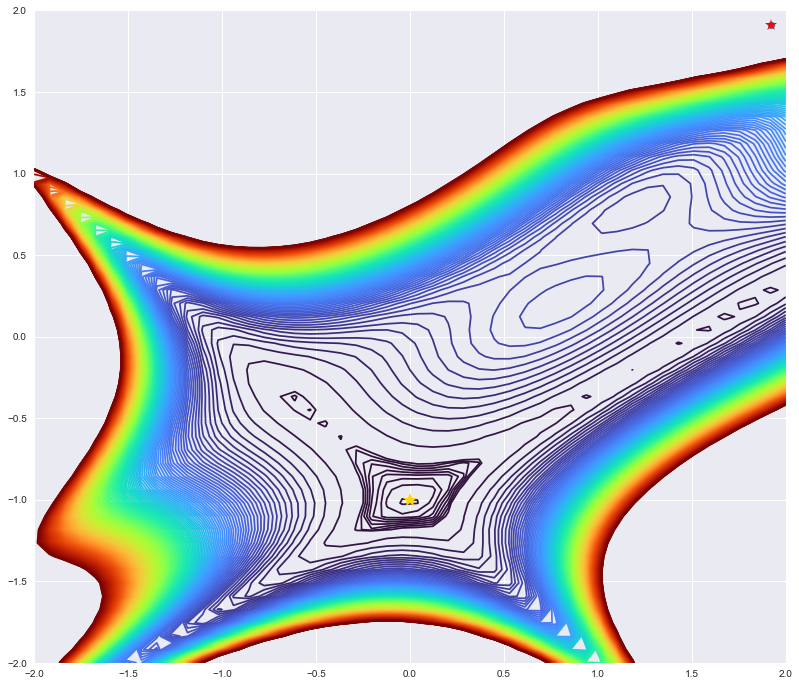

best point we got is: [1.9188291044455834, 1.9115540798662263] with value = 53450.68310299816


In [699]:
plot_optim(GD(samples[4546]))

  0%|                                                                                       | 4/100000 [00:00<?, ?it/s]


Gradient exploded. path lenght = 2


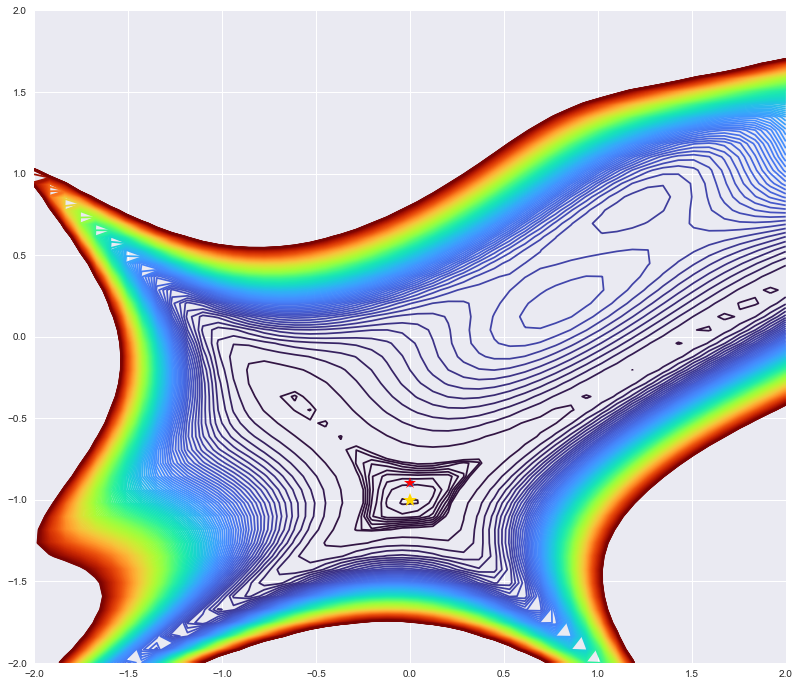

best point we got is: [0, -0.9] with value = 7.672279289999975


In [700]:
plot_optim(GD([0,-.9]))

# Notes:
Gradient Decent algorithm is well know optimzation algorithm in Mechain learning(ML). since it scales well with dimentionallity
and it is not that hard or expensive to comute the first dervatives of a function

but as we can see from the code notes, Gradeint decent is prone to a lot of problems most notiable when the gradient increase to infinty and also the gradient is not a garanted to converge.

* in ML gradient explosion is dealt with using gradient cliping where the grad(f) value is set to a max. e.g         $max(val_{max},grad(f))$ And for the gradient setteling in local minimums, A "momentum" is introduced. Momentum is basiclly the adjusment of the learning rate as the gradient decent algorithm moves along to give the algorithm a better chance to "skip" over local minimum 

Lastly the gradient decent does not compleltly converge per sa put gets very close the minimum and settles near it.
   * Here we get another possible problem, as we can observe from the above figures, choocing good stopping condition $\epsilon$ and learning rate $lr$ greatlly affect the algorithm abilly to converge.
        * for example $\epsilon = 10^{-6}$ gets us far closer to the minimum than $\epsilon = 10^{-3}$
        * As for the Learning Rate $lr$ is value should be taken with respect to $\epsilon$.
            * example for $\epsilon = 10^{-6}$ a $lr = [10^{-3}, 10^{-5}]$ should be considered
        


<hr style="border:2px solid gray; marging: 0" > </hr>
<h1 style="font-size: 50px" >Newton Method</h2>
<hr style="border:2px solid gray"> </hr>


## Newton Medthod for muli-dimentional function is the generilzation of the well know Newton Method for d diemntion where d > 1.

### The standered equation fo NM is $x_{i+1} = x_i - \frac{f}{f'}$
### for optimzation instead of $\frac{f}{f'}$ we use the first and seconde dervatives of f $\frac{f'}{f''}$
### but since we will you two variable function the dervative of a function $f(x,y)$ is actually a vector/matrix of the partial dervatives of function with recpect every to ever variable.
### for example
### $f'(x,y) = \begin {bmatrix} \frac{df}{dx},\frac{df}{dy} \end{bmatrix}$ 
### and
### $f''(x,y) = \begin {bmatrix}
                \frac{df}{dx^2} & \frac{df}{dxdy}\\
                \frac{df}{dydx} & \frac{df}{dy^2}
                \end{bmatrix}$
                
### but we subbing back $f'(x,y)$ and $f''(x,y)$ in $x_{i+1} = x_i - \frac{f}{f'}$ we get a problem the divistion of a matrix is undefined but we have what is called 'Inverstion'
### rewriting NM with matrix inverstion we get $x_{i+1} = x_i - (f''^{-1})(f')$ where $f''^{-1}$ is the inverse of $f''$.

### In Mathimatical littsure $f'$ is called the Jacobian of $f$ and $f''$ is know as the Hessian of $f$


In [701]:
def nm(X,lr=1e-1,time_out=5000):
    
    #set the first sample as the initial point on the path
    path = [X]
    #use a counter to check if the NM is stuck
    iterations = 0
    
    #start the loop
    for _ in tqdm(range(time_out)):
        
        #calculate the inverse Hessian and Jacobian of f at X
        inv_hess = inverse(hess(X))
        jac = jacob(X)
        
        # calculate the next step according to the above formula 
        step_x = X[0] - lr*(inv_hess[0][0]*jac[0] + inv_hess[0][1]*jac[1])
        step_y = X[1] - lr*(inv_hess[1][0]*jac[0] + inv_hess[1][1]*jac[1])
        
        #check the stopping condition
        if math.dist(X,[step_x,step_y]) < 10**-3: 
            print("STOP STOP STOP")
            print(f'path lenght = {len(path)}')
            break
        
        #a Time out check if NM is takeing a lot of iteration to converge.
        if iterations == time_out:
            print("Time out F")
            print(f'path lenght = {len(path)}')
            break
        
        #append X in the path
        path.append(X)
            
        #increase the counter and update X
        iterations += 1
        X = [step_x,step_y]
    
    #return the search path
    return path

  1%|█                                                                            | 69/5000 [00:00<00:00, 16265.22it/s]


STOP STOP STOP
path lenght = 70


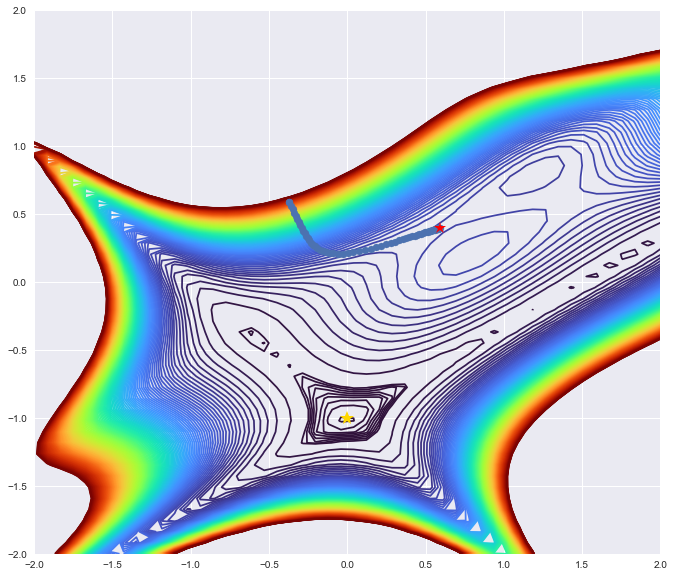

best point we got is: [0.5900611005916743, 0.39674804314254075] with value = 989.9984897988318


In [702]:
plot_optim(nm(samples[0]),10)

  1%|▍                                                                            | 31/5000 [00:00<00:00, 15234.14it/s]

STOP STOP STOP
path lenght = 32


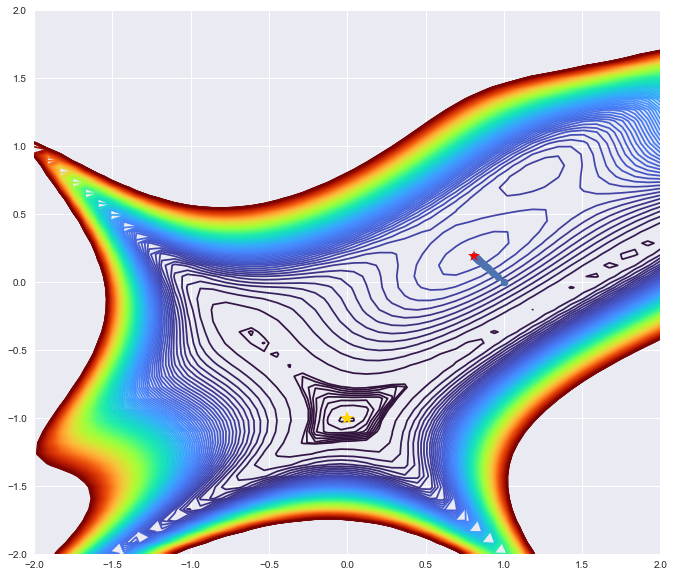

best point we got is: [0.8078795204510354, 0.19212047954896455] with value = 1154.3775067331358


In [703]:
plot_optim(nm([1,0]),10)

  1%|█                                                                            | 72/5000 [00:00<00:00, 14417.54it/s]


STOP STOP STOP
path lenght = 73


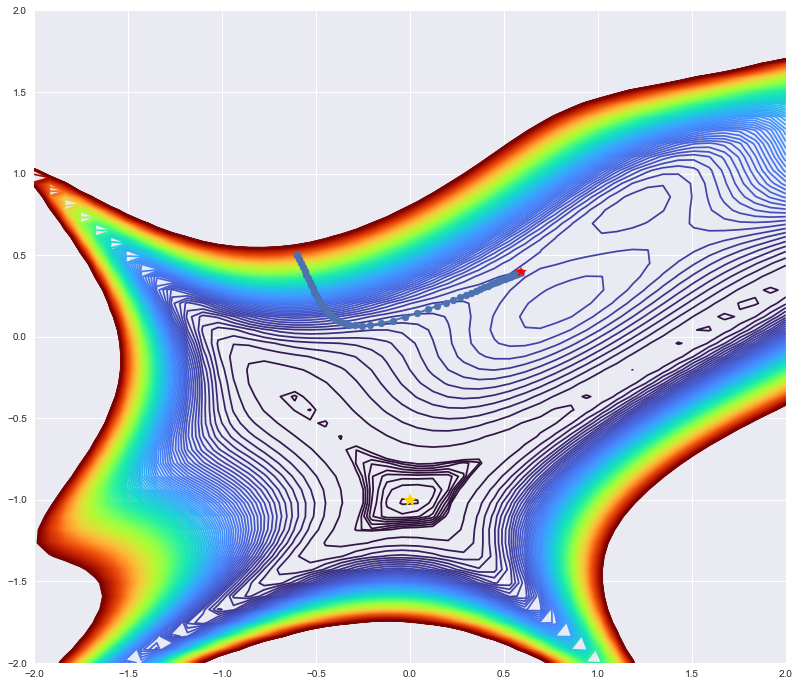

best point we got is: [0.5902667050133961, 0.3954082568431512] with value = 989.9451132132908


In [709]:
plot_optim(nm([-0.6,0.5]))